# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

Write the problem in your own words here

In [1]:
#import your libraries
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
import pickle

#auther info here
__author__ = "Padmakar Kalamkar"
__email__ = "kalamkar.padmakar@gmail.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [2]:
#load the data into a Pandas dataframe

#feature information
train_features_df = pd.read_csv("data/train_features.csv")

#salaries information
given_train_salaries_df = pd.read_csv("data/train_salaries.csv")

#testing dataframe
test_features_df = pd.read_csv("data/test_features.csv")

#### 2.1 Examining the data

In [3]:
train_features_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [4]:
given_train_salaries_df.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [5]:
# combining both dataframes for train our features on the target 'salary'

salaries_df = pd.merge(train_features_df, given_train_salaries_df, how = 'inner')

In [6]:
salaries_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


#### 2.2 checking lengths and datatypes

In [7]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
salary                 1000000 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [8]:
test_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [9]:
print(f"salaries_df_shape = {salaries_df.shape} ")
print(f"test_features_df_shape = {test_features_df.shape} ")

salaries_df_shape = (1000000, 9) 
test_features_df_shape = (1000000, 8) 


In [10]:
#keeping a copy of  our training data

full_salary_df = salaries_df.copy()

full_test_features_df = test_features_df.copy()

In [11]:
# droping "company Id" from both the dataframes as I think it will not add any value in prediction the target

salaries_df = salaries_df.drop('companyId', axis = 1)
test_features_df = test_features_df.drop('companyId', axis = 1)

### ---- 3 Clean the data ----

In [12]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it

#checking the colunm names 
print(salaries_df.columns)

print(test_features_df.columns)

Index(['jobId', 'jobType', 'degree', 'major', 'industry', 'yearsExperience',
       'milesFromMetropolis', 'salary'],
      dtype='object')
Index(['jobId', 'jobType', 'degree', 'major', 'industry', 'yearsExperience',
       'milesFromMetropolis'],
      dtype='object')


#### 3.1 checking numerical and categorical variables

In [13]:
numeric_var = ['yearsExperience','milesFromMetropolis','salary']

categorical_var = ['jobId', 'jobType', 'degree', 'major', 'industry']

In [14]:
#checking the colunm names 
print(salaries_df.columns)

print(test_features_df.columns)

Index(['jobId', 'jobType', 'degree', 'major', 'industry', 'yearsExperience',
       'milesFromMetropolis', 'salary'],
      dtype='object')
Index(['jobId', 'jobType', 'degree', 'major', 'industry', 'yearsExperience',
       'milesFromMetropolis'],
      dtype='object')


In [15]:
#checking the colunm names 
print(salaries_df.columns)

print(test_features_df.columns)

Index(['jobId', 'jobType', 'degree', 'major', 'industry', 'yearsExperience',
       'milesFromMetropolis', 'salary'],
      dtype='object')
Index(['jobId', 'jobType', 'degree', 'major', 'industry', 'yearsExperience',
       'milesFromMetropolis'],
      dtype='object')


#### 3.2 Missing Values

Let see that we dont have any missing values in the data

In [16]:
#checking the count of all missing values in each column for training data:
salaries_df.isna().sum()

jobId                  0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [17]:
#checking the count of all missing values in each column for testing data:
test_features_df.isna().sum()

jobId                  0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

#### 3.3 Correct Data format


We need to check if all data is in the correct format

In [18]:
salaries_df.dtypes

jobId                  object
jobType                object
degree                 object
major                  object
industry               object
yearsExperience         int64
milesFromMetropolis     int64
salary                  int64
dtype: object

In our dataset all the datatypes look fine!!. Now we have a dataset with no missing values and all data in proper format.

#### 3.4 Looking for Duplicated data rows for both the datasets

In [19]:
salaries_df.duplicated().sum()

0

In [20]:
test_features_df.duplicated().sum()

0

We do not have any duplicated data, if you find any you will have to remove it

#### 3.5 Looking for invalid data or corrupt data

In our dataset we can check if our data is valid, like having a salary less than or equal to zero is not valid and years of experience cannot be less than zero.

In [21]:
#checking the rows which has salaries <=0

salaries_df[salaries_df['salary'] <= 0]

,jobId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [22]:
#dropping the rows from the dataframe

salaries_df.drop(salaries_df.index[[30559,495984,652076,816129,828156]], inplace=True )

In [23]:
#checking the rows which has years of experience < 0

salaries_df[salaries_df['yearsExperience'] < 0]

,jobId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary


In [24]:
#checking the rows which has milesFromMetropolis < 0

salaries_df[salaries_df['milesFromMetropolis'] < 0]

,jobId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary


### ---- 4 Explore the data (EDA) ----

In [ ]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

#### 4.1 Analyzing each feature Patterns using Visualization

we can calculate correlation between variables of type "int64" using the method corr

In [25]:
salaries_df.corr()

,yearsExperience,milesFromMetropolis,salary
yearsExperience,1.000000,0.000672,0.375013
milesFromMetropolis,0.000672,1.000000,-0.297686
salary,0.375013,-0.297686,1.000000


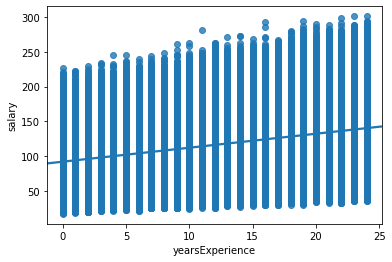

In [26]:
# Years of experience as  possible predictor variable of salary

sns.regplot(x ="yearsExperience",y = "salary", data = salaries_df)

As the years of Experience goes up, the salary is increased, this indicates a positive direct correlation between these two variables. Since we have a lot of datapoints which has same experience we cannot see a perfect scatterplot in this case, But Years of Experience seems like a decent predictor of salary

miles From Metropolis is also a potential preictor of salary

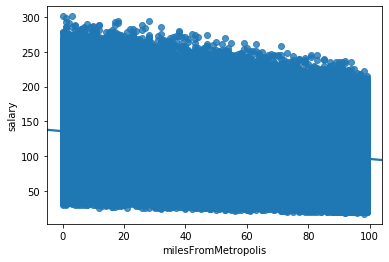

In [27]:
sns.regplot(x ="milesFromMetropolis",y = "salary", data = salaries_df)

As milesFromMetropolis increases, salary goes down. This indicates a negative relationship between these two variables. It could be due to various reasons the trend is as such. There is definetly not high inverse relation, but milesFromMetropolis could be a predictor of salary

#### 4.1.1 looking into categorical variables

Lets check relation between "jobtype" and "salary"

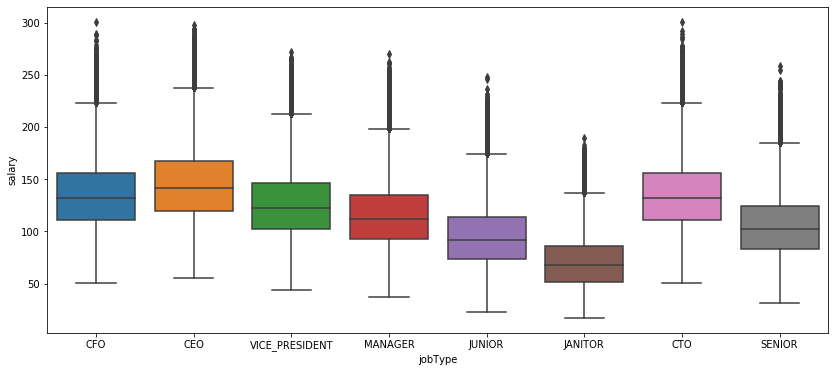

In [28]:
plt.figure(figsize = (14,6))
sns.boxplot(x="jobType", y="salary", data=salaries_df)

From the above plot, we can see that the distribution of salary between the different job type categories differ. So Job Type can be a predictor of salary.

Lets check relation between "degree" and "salary"

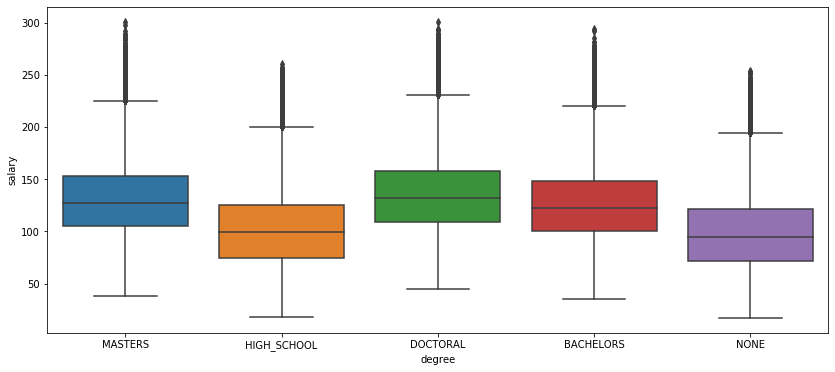

In [29]:
plt.figure(figsize = (14,6))
sns.boxplot(x="degree", y="salary", data=salaries_df)

Again, we can see that the distribution of salary between the different degree categories differs. So degree can be a predictor of salary.

checking the relation between "major" and "salary" and relation between "industry" and "salary"

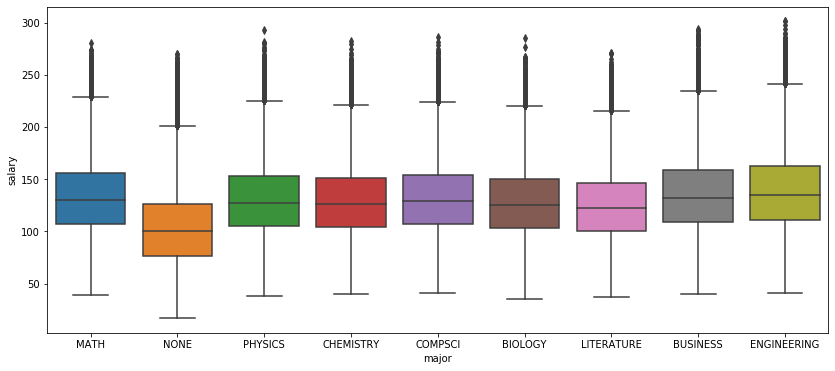

In [30]:
plt.figure(figsize = (14,6))
sns.boxplot(x="major", y="salary", data=salaries_df)

We see that the distribution of salary between different "major" categories have a significant overlap, so it would not be a good predictor of salary.

Relation between "industry" and "Salary"

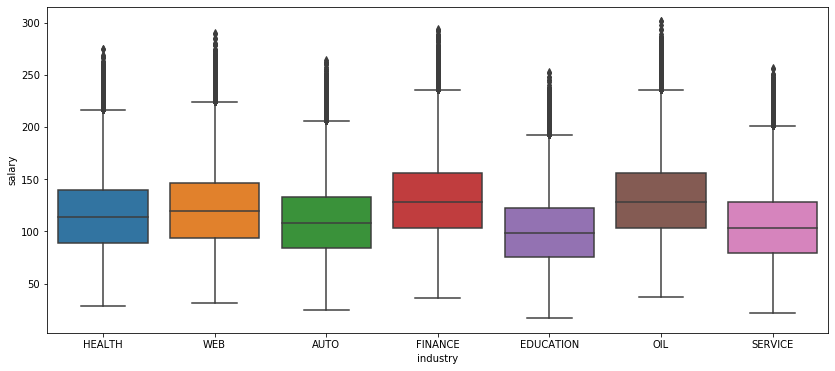

In [31]:
plt.figure(figsize = (14,6))
sns.boxplot(x="industry", y="salary", data=salaries_df)

we can see that the distribution of salary between the different Industry categories differs. So Industry attribute can be a good predictor of salary.

#### 4.1.2 Visualizing target varible

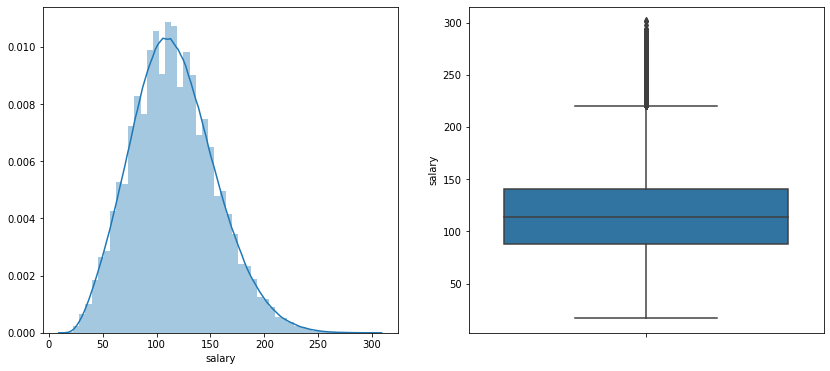

In [32]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.distplot(salaries_df['salary'])
plt.subplot(1,2,2)
sns.boxplot(salaries_df['salary'], orient="v")

We can see that the salary values are close to normal and from the box plot it looks like we have some outliers we will have to be investigated.

#### 4.2 Examing the outliers in our target variable

In [33]:
# using IQR rule

salary_stats = salaries_df['salary'].describe()

In [34]:
IQR = salary_stats['75%'] - salary_stats['25%']
upper_outliers = salary_stats['75%'] + 1.5* IQR
lower_outliers = salary_stats['25%'] - 1.5* IQR

print(f"Upper and lower bounds of outliers are {upper_outliers} and {lower_outliers}")

Upper and lower bounds of outliers are 220.5 and 8.5


Upper and lower bounds of outliers are 220.5 and 8.5

Since we have the upper and lower bounds of outliers we can easily check if we have any potential outliers present in our dataset that needs to be removed.

In [35]:
# checking the outliers in upper bound

salaries_df[salaries_df['salary'] > 220.5]

,jobId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
266,JOB1362684407953,CEO,MASTERS,BIOLOGY,OIL,23,60,223
362,JOB1362684408049,CTO,MASTERS,NONE,HEALTH,24,3,223
560,JOB1362684408247,CEO,MASTERS,BIOLOGY,WEB,22,7,248
670,JOB1362684408357,CEO,MASTERS,MATH,AUTO,23,9,240
719,JOB1362684408406,VICE_PRESIDENT,DOCTORAL,BIOLOGY,OIL,21,14,225
966,JOB1362684408653,CEO,DOCTORAL,ENGINEERING,FINANCE,23,11,247
986,JOB1362684408673,CFO,HIGH_SCHOOL,NONE,FINANCE,24,20,229
1211,JOB1362684408898,CTO,DOCTORAL,BUSINESS,FINANCE,5,46,232
1222,JOB1362684408909,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
1413,JOB1362684409100,VICE_PRESIDENT,MASTERS,MATH,WEB,24,15,241


we have many rows whose salary is above the upper bound, but it can be seen that most of the jobtypes are higher officials whose salary is generally high.

we can check the value counts of the jobtype

In [36]:
salaries_df.loc[salaries_df['salary'] > 220.5,'jobType'].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

It can be seen that the salary is high for 20 junior level jobs, which can be a potential outliers.

In [37]:
salaries_df[(salaries_df['salary'] > 220.5) &(salaries_df['jobType'] == 'JUNIOR')]

,jobId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,JOB1362684597269,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,JOB1362684622293,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,JOB1362684711465,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,JOB1362684835280,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


It is clearly visible that the jobs which pay high salaries for JUNIOR roles is from "OIL" and "Finance" which can be the ideal case. so these all are not potential outliers , we keep them in the training data set.

I am dropping the varibles which we found will not be potential predictors of salary.

#### 4.3 encoding categorical data for both training and testing data

In [38]:
def one_hot_encode(df, categorical_var):
  categ_df = pd.get_dummies(df[categorical_var])
  return categ_df

One hot encoding the train data

In [39]:
categories = ['jobType','degree','major','industry']

salaries_categ_df = one_hot_encode(salaries_df,categories)

In [40]:
# merge data frame "salaries_df" and "salaries_categ_df" 
train_salaries_df = pd.concat([salaries_df, salaries_categ_df], axis=1)

# drop original columns from datafrme
train_salaries_df.drop(['jobType','degree','major','industry'], axis = 1, inplace=True)

In [41]:
train_salaries_df.head()

,jobId,yearsExperience,milesFromMetropolis,salary,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,...,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,JOB1362684407687,10,83,130,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,JOB1362684407688,3,73,101,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,JOB1362684407689,10,38,137,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,JOB1362684407690,8,17,142,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,JOB1362684407691,8,16,163,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


one hot encoding the test data

In [42]:
test_dummy_df = one_hot_encode(test_features_df ,categories)

# merge data frame "salaries_df" and "test_features_df" 
test_salaries_df = pd.concat([test_features_df, test_dummy_df], axis=1)

# drop original columns from dataframe
test_salaries_df.drop(['jobType','degree','major','industry'], axis = 1, inplace=True)

In [43]:
test_salaries_df.head()

,jobId,yearsExperience,milesFromMetropolis,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,...,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,JOB1362685407687,22,73,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
1,JOB1362685407688,20,47,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
2,JOB1362685407689,17,9,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,JOB1362685407690,14,96,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,JOB1362685407691,10,44,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


Now we have our data ready to be used for developing any machine learning model.

### ---- 5 Establish a baseline ----

Now I will be creating a simple base line model and measure its efficacy. This will give us a base to start with and we can improve our performance using different models later.

I will calculate "average Salary" for each industry and simply assign each job posting a mean salary of corresponding industry.

I will be using MSE as the scoring metric, it is most simple metric and gives decent results for regression problems.

In [44]:
# calculating industry mean and calculating the scoring metric

avg_sal = salaries_df.groupby('industry')['salary'].mean().to_dict()

In [45]:
avg_sal

{'AUTO': 109.43522152496485,
 'EDUCATION': 99.44838571898697,
 'FINANCE': 130.747658645164,
 'HEALTH': 115.7355399110364,
 'OIL': 130.95386285634237,
 'SERVICE': 104.44682029458984,
 'WEB': 121.6453615446388}

In [46]:
#creating a new column and placing these values corresponding to the industry 

salaries_df['Predicted salary'] = ''

#asssigning the values for the new column

for i in range(len(salaries_df)):
  salaries_df['Predicted salary'].values[i] = avg_sal[salaries_df['industry'].values[i]]

salaries_df.head()

,jobId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary,Predicted salary
0,JOB1362684407687,CFO,MASTERS,MATH,HEALTH,10,83,130,115.736
1,JOB1362684407688,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101,121.645
2,JOB1362684407689,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137,115.736
3,JOB1362684407690,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142,109.435
4,JOB1362684407691,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163,130.748


Now that we have the predicted salary values which is just the average value for the industry, we will use these to find model efficacy.

In [47]:
actual_values = salaries_df['salary']

predicted_values = salaries_df['Predicted salary']

mse = mean_squared_error(actual_values, predicted_values)

print(f"MSE : {mse}")

MSE : 1367.122950785255


we can use the above model as our base model and try to develop models which performs better than than our base model.

### ---- 6 Hypothesize solution ----

From the observed results of our baseline model, it is clear that we can definetly improve results.I plan to use develop following models:

1. I would check the Multiple Linear Regression as I feel this is a reasonable choice for any predictive model when the features seems to be linear with the target.
2. I will then try to use Random Forest as it is one of the popular and most commoly used algorithms.
3. I would like to check how gradient boosting works on this data.

I expect to bring down the MSE to less than 360. Which ever model gives me values closer to my desired values i will have to choose that model.

## Part 3 - DEVELOP

### ---- 7 Engineer features  ----

In [48]:
#making sure that data is ready for modeling

train_salaries_df.head()

,jobId,yearsExperience,milesFromMetropolis,salary,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,...,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,JOB1362684407687,10,83,130,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,JOB1362684407688,3,73,101,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,JOB1362684407689,10,38,137,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,JOB1362684407690,8,17,142,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,JOB1362684407691,8,16,163,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [49]:
test_salaries_df.head()

,jobId,yearsExperience,milesFromMetropolis,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,...,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,JOB1362685407687,22,73,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
1,JOB1362685407688,20,47,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
2,JOB1362685407689,17,9,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,JOB1362685407690,14,96,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,JOB1362685407691,10,44,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [50]:
test_salaries_df.shape

(1000000, 32)

In [51]:
#defing the funcion to calculate mean squared error for 5-fold cross validation

def cal_mse(model,feature_df,target_df):
  neg_mse = cross_val_score(model, feature_df, target_df, cv=5, scoring='neg_mean_squared_error')
  mean_mse = -1.0*np.mean(neg_mse)
  print(f"MSE [{model}]: {mean_mse}")

In [52]:
# defining the Traing features and target

target = train_salaries_df['salary']

train_salaries_df.drop(['salary','jobId'],axis=1,inplace = True)

In [53]:
train_salaries_df.head()

,yearsExperience,milesFromMetropolis,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,...,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,10,83,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,3,73,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,10,38,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3,8,17,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,8,16,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0


we already have a test data to predict values on!!, but we need to make sure our model is fitting well on the current data. For that checking, I have further divided the data into 80:20, where 20% of the data is used for validation. If we are satisfied with the performance of our model on this validataion set we can try predicting values on actual test set.

In [54]:
#split the data set into train and validation subsets
X_train, X_val, y_train, y_val = train_test_split(train_salaries_df, target, test_size=0.20,random_state=42)

### ---- 8 Create models ----

#### 8.1 Multiple Linear Regression

In [55]:
#create linear regression object
mlr = LinearRegression()

#fit the training data to the model

mlr.fit(X_train,y_train)

#Getting the predicted values

y_pred = mlr.predict(X_val)

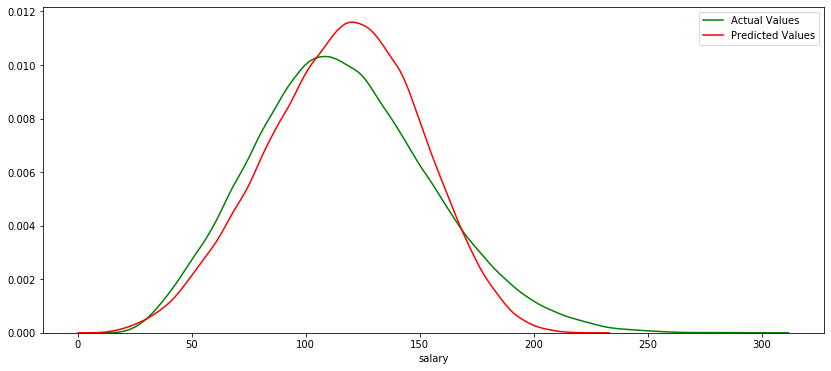

In [56]:
#plotting these results against actul values

plt.figure(figsize=(14,6))
ax1 = sns.distplot(y_val, hist=False, color="g", label="Actual Values")
sns.distplot(y_pred, hist=False, color="r", label="Predicted Values" , ax=ax1)

In [59]:
#calclating MSE for Multiple Linear regression
mean_squared_error(y_val, y_pred)

383.2826510991204

The value is MSE is pretty good as we have just done simple Multiple Linear Regression, lets check on other two models. But we have calculted the mean square error only on our validation data, the model performs well on our validation data.

#### 8.2 Random Forest

In [57]:
#creating a random forest object and fitting it our model
rf = RandomForestRegressor(n_estimators=150,max_depth=25, min_samples_split = 60,max_features=30)

#fitting the model
rf.fit(X_train,y_train)

#getting predicted values
rf_pred = rf.predict(X_val)

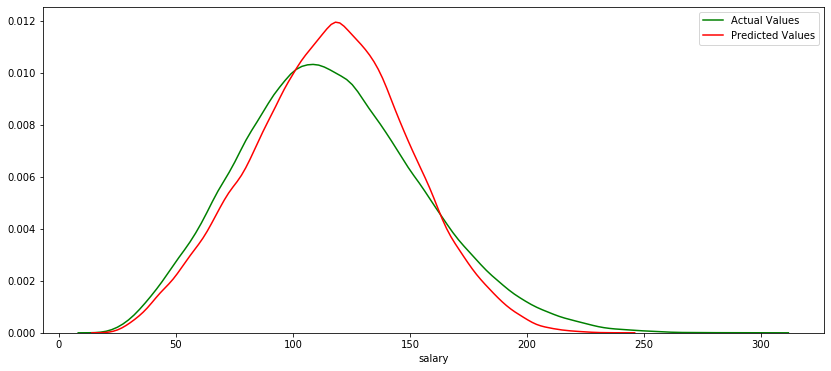

In [58]:
#plotting these results against actual values

plt.figure(figsize=(14,6))
ax1 = sns.distplot(y_val, hist=False, color="g", label="Actual Values")
sns.distplot(rf_pred, hist=False, color="r", label="Predicted Values" , ax=ax1)

In [59]:
#calclating MSE for Random Forest
mean_squared_error(y_val, rf_pred)

364.7166271608418

There is significant reduction in MSE value,we can see that Random forest is fitting the model well

#### 8.3 Gradient Boosting Regression

In [63]:
#creating Gradient Boosting Regression Object
gbm = GradientBoostingRegressor(n_estimators=130, max_depth=10, loss='ls')

#fitting the model
gbm.fit(X_train,y_train)

#getting predicted values
gbm_pred = rf.predict(X_val)

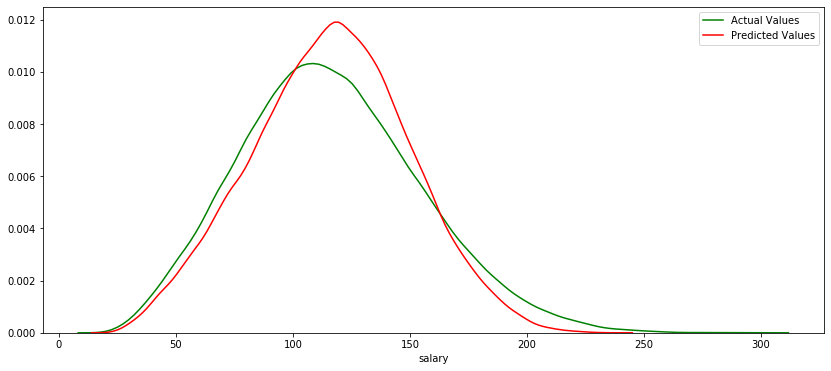

In [64]:
#plotting these results against actual values

plt.figure(figsize=(14,6))
ax1 = sns.distplot(y_val, hist=False, color="g", label="Actual Values")
sns.distplot(gbm_pred, hist=False, color="r", label="Predicted Values" , ax=ax1)

In [65]:
#calclating MSE for gradient boosing
mean_squared_error(y_val, gbm_pred)

364.78434689681586

Both the Gradient boosting and Random forest gave similar MSE values, so we can choose any one of them for deployment.

### ---- 9 Select best model  ----

From the above results it is clear that Rndom Forest performs really well with the validation data, and we get the lowest MSE among other models. So we will choose this model and use it for deployment

## Part 4 - DEPLOY

### ---- 10 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

In [60]:
# using the choosen model and its hyperparameters
final_rf = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features=30, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=60, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=2, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [61]:
#using this to fit our whole training set
final_rf.fit(train_salaries_df,target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
                      max_features=30, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=60,
                      min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=2,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [98]:
model_name = 'final_random_forest_model.pkl'
# DATA_PATH =  "/Users/Padmakar/Documents/Portfolio_Project/"

In [101]:
#saving the model
with open(model_name,'wb') as file:
  pickle.dump(final_rf,file)

In [105]:
#loading the model
# with open (DATA_PATH+model_name, 'rb') as file:
with open('/Users/Padmakar/Documents/Portfolio_Project/final_random_forest_model.pkl','rb') as file:
  model_loaded = pickle.load(file)

In [106]:
#fitting the model on actual test data

final_test = test_salaries_df.copy()

test_salaries_df.drop('jobId', axis = 1, inplace = True)

final_predictions = model_loaded.predict(test_salaries_df)

### ---- 11 Deploy solution ----

In [ ]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

In [107]:
solution = pd.concat([final_test['jobId'], pd.DataFrame(final_predictions, columns = ['Predicted Salary'])], axis = 1)

solution.head()

,jobId,Predicted Salary
0,JOB1362685407687,113.554066
1,JOB1362685407688,91.985940
2,JOB1362685407689,178.699555
3,JOB1362685407690,106.597899
4,JOB1362685407691,111.282380


In [109]:
#saving the predictions to a CSV file
solution.to_csv('Predictions.csv')